<a href="https://colab.research.google.com/github/vadillo87/EJERCICIOS-QUINCENA-1/blob/main/practicas/practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3
* Puede resolver aquí los ejercicios abriendo una celda después de cada uno de los enunciados.  
* Por favor, documente la solución de los ejercicios añadiendo suficientes **comentarios** del programador que expliquen el código.

## Ejercicio 3.1. Trabajar con un DataSet
* Obtener un dataset, preferiblemente con datos financieros, actuariales, económicos o estadísticos.
* Crear un modelo de análisis de los datos, utilizando las librerías principales para el análisis de datos, por ejemplo:
    - NumPy
    - Pandas
    - Matplotlib

## Ejercicio 3.2. Gráfico histórico de un índice o valor bursátil
* Descargar un archivo con formato ***csv*** de la página de Yahoo Finanzas con la cotización de:
 - un índice (IBEX, NASDAQ, ...) o
 - valor bursátil,
* o bien, de otra fuente disponible.
* Crear un procedimiento que lea el fichero y finalmente obtenga un gráfico del histórico del índice o valor.
* Tomar el periodo histórico más largo posible.
* Alternativamente o adicionalmente, si disponemos de una API o fuente de información diferente de un *csv* descargado de forma manual, también se podría realizar de una forma más automatizada.

## Ejercicio 3.3. Trabajar con la Librería openpyxl
* Crear una aplicación programada en Python que permita interactuar con la **hoja de cálculo** tanto para lectura, como para escritura.
* Utilice la Librería openpyxl, u otra que considere adecuada para interactuar con hoja de cálculo

## Ejercicio 3.4. Librería actuarial
* Utilizando la librería actuarial **pyliferisk**, o cualquier otra que considere adecuada en este campo, cree un caso donde se muestren diferentes cálculos y procedimientos que se puedan realizar con ella.
* Alternativamente, puede realizar su propia librería actuarial y probarla creando ejemplos prácticos. En este caso, no olvide documentar la funcionalidad de los métodos que programe, utilizando POO.

In [10]:
!pip install pyliferisk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


----------------AÑO LIMITE TABLA---------------
120
115
----------------LX AÑO A AÑO---------------
[100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 99842.15, 99682.891786535, 99523.33934994147, 99364.59962367831, 99207.75260317232, 99053.95082431163, 98904.43879093742, 98759.61302121585, 98618.99908419624, 98482.11591346738, 98348.43628932645, 98217.38699797093, 98088.3588166717, 97960.66739116416, 97833.6319976913, 97706.49719291029, 97578.4625989887, 97448.6930015783, 97316.29920726636, 97180.34833727381, 97039.88386178711, 96893.88735651705, 96741.24072637559, 96580.73733388646, 96411.08361068575, 96230.85273098393, 96038.5546179716, 95832.59993759336, 95611.2649647775, 95372.52363616045, 95113.99733633992, 94832.9830312097, 94526.43541356132, 94191.03671542693, 93823.1547833275, 93418.89895631257, 92974.16894594114, 92484.61345935629, 91945.71486518996, 91352.90406316814

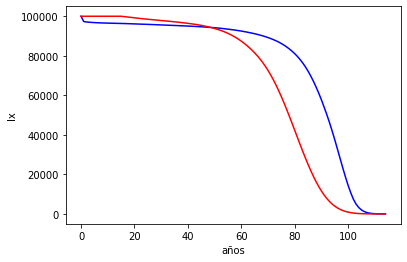

In [43]:
from pyliferisk import MortalityTable
from pyliferisk.mortalitytables import GKM95, SPAINPERM2000
import matplotlib.pyplot as plt
from pyliferisk import *

#comparamos la tabla GKM95 con la nueva tabla introducida por la DGS mas actualizada
tabGK = MortalityTable(nt=GKM95)
tabPERM = MortalityTable(nt=SPAINPERM2000)

#vamos a ver hasta que edad duran las tablas
print("----------------AÑO LIMITE TABLA---------------")
print(tabGK.w)
print(tabPERM.w)

#lanzamos sus lx de toda la tabla 
print("----------------LX AÑO A AÑO---------------")
print(tabGK.lx)
print(tabPERM.lx)

#comprobamos con la lx si coincide con la tasa de mortalidad
print("----------------Qx CALCULADA POR LAS Lx---------------")
print((tabGK.lx[50]-tabGK.lx[51])/tabGK.lx[50])
print((tabPERM.lx[50]-tabPERM.lx[51])/tabPERM.lx[50])

#vemos como coincide la qx 
print("----------------Qx segun libreria Python---------------")
print(tabGK.qx[50] / 1000)
print(tabPERM.qx[50] / 1000)

#observamos como la tabla PERM azul es menos agresiva (mas barata) que la GK, esto tiene sentido porque según pasan los años la Esperanza de Vida es mayor.

x = range(0, tabPERM.w)
y = tabPERM.lx[:tabPERM.w]
z = tabGK.lx[:tabPERM.w]
plt.plot(x,y, color = 'blue')
plt.plot(x,z, color = 'red')
plt.ylabel('lx')
plt.xlabel('años')

#adicionalmente vamos a ver un producto de vida a 10 años, prima unica. 
#Este producto nos sirve para poder obtener a modo ejemplo como se puede calcular la dotación por tablas que realizan las empresas aseguradoras de vida. 
#En este caso sale menos Provisión (consideramos que la provisión matemátic es la prima)y por lo tanto no se dota insuficiencia de tablas, pero hay muchas situaciones
#en las que si se debe dotar provision.

print("----------------IMPACTO TABLAS---------------")

nt1 = Actuarial(nt=GKM95, i=0.06)
x = 30
n = 10
C = 1000

print(C * (Axn(nt1, x, n) ))

nt2 = Actuarial(nt=SPAINPERM2000, i=0.06)
x = 30
n = 10
C = 1000

print(C * (Axn(nt2, x, n) ))


#Por ultimo tambien vamos a comprobar aunque no es exactamente así porque las polizas y las carteras estan casadas y se hace solo con la parte de la cola no casada.
print("----------------IMPACTO TIPOS---------------")
nt3 = Actuarial(nt=SPAINPERM2000, i=0.0054)
x = 30
n = 10
C = 1000

print(C * (Axn(nt3, x, n) ))

nt4 = Actuarial(nt=SPAINPERM2000, i=0.0046)
x = 30
n = 10
C = 1000

print(C * (Axn(nt4, x, n) ))

print("----------------Comparativa grafica entre las dos tablas AZUL(PERM) ROJA(GKM95)---------------")

## Ejercicio 3.5. Trabajar con una API
* Localizar una API con datos que puedan resultar de interés.
* Crear una aplicación programada en Python que utilice los datos de la API, preferiblemente con datos en tiempo real.
* Mostrar la información que nuestra aplicación pueda procesar, según ciertos filtros, que faciliten el uso de la API.

## Ejercicio 3.6. Página web con Flask
* Crear una aplicación de página web programada en Python con el framework Flask.
* Puede desplegarla en alguna plataforma gratuita como, por ejemplo, [Pythonanywhere](https://www.pythonanywhere.com) o [Heroku](https://www.heroku.com).

## Ejercicio 3.7. Bot de Telegram que proporciona cotizaciones en tiempo real
Crear un Bot de Telegram programado en Python que realizando **Web Scraping** nos pueda dar precios en tiempo real de valores cotizados en bolsa, o en mercados financieros internacionales.  
Adjuntar capturas de pantalla mostrando el funcionamiento del bot en Telegram.

## Ejercicio 3.8. Estrategias de Trading
* Elegir una compañía cotizada y realizar con ella diferentes estrategias de trading, con gráficos e indicadores bursátiles.
* Puede utilizar la librería TA-Lib u otro sistema para efectuar el análisis.

## Ejercicio 3.9. Finanzas
Estudie casos en el campo de las finanzas:
* VAN y TIR
* Cuadro de amortización de préstamos
* Operativa con activos de Renta Fija: bonos
* *Duration*
* Estructura Temporal de los Tipos de Interés (ETTI)
* Forwards sobre tipos de interés
* Arbitraje
* Random Walk en una y dos dimensiones
* ... / ...


## Ejercicio 3.10. Valoración de opciones financieras
* Método de valoración de opciones europeas mediante arbol binomial
* Método de Black-Scholes
* Convergencia de ambos métodos
* Gráfico de convergencia
* Arbitraje en caso de no cumplirse la paridad Put-Call